# Building a Spam Filter

In this project, we use Naive Bayes Theorem to build a spam filter.

We need to:

- Understand our information.
- Prepare & clean the information.
- Create a function for the Multinomial Naive Bayes Theorem.
- Test it against our information.

We're using a dataset put together by Tiago Almeida and Jose Hidalgo to perfect our detection algorithm, downloaded from here:

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

# Importing the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
spam = pd.read_csv("SMSSpamCollection", sep="\t",header=None, names=["Label","SMS"])
spam.head(5)

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Understanding the Information

Below we get some basic information about our data set. For our readers:

- "spam" is not the delicious meat snack-- it is an unsolicited message.
- "ham" is also not the delicious meat-- it is a desired & acceptable message.

We also split our data into two datasets: a test set with 20% of the data, and a training set with 80% of the data. We can work on our spam detection algorithm and test it with human-verified data, this way.

In [2]:
#How many (rows, columns) there are in our data.
spam.shape

(5572, 2)

In [3]:
#How many types of messages there are: ham & spam.
spam["Label"].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [4]:
#This gives us percentages of ham vs spam.
#We're creating a pie chart with this later to communicate sample representation.
spam["Label"].value_counts(normalize=True)
pie_1 = spam["Label"].value_counts(normalize=True)

After a very brief examination, we see that normal messages make up almost 87% of content in our dataset. In fact, these labels are true and hand-determined. We're going to take about 80% of the dataset for training, and leave 20% for testing purposes.

The code for this is below.

In [5]:
#Here we make a randomized version of the dataset above.

sample = spam.sample(frac=1, random_state=1)
sample.head(1)

,Label,SMS
1078,ham,"Yep, by the pretty sculpture"


In [6]:
#Here we extract data into new sets: 80% of data for training, 20% of data for testing. 
#About 80% of 5572 entries is 4457. 
#ts = training set ; test = test set

training_set_index = round(len(sample) * 0.8)

ts = sample.iloc[:training_set_index].reset_index(drop=True)
test = sample.iloc[training_set_index:].reset_index(drop=True)

In [7]:
print(ts.shape)
print(test.shape)

(4458, 2)
(1114, 2)


In [8]:
#Let's test the percentages of both sets. We're looking to see if they roughly match 87% ham messages like above.

test["Label"].value_counts(normalize=True)
pie_2 = test["Label"].value_counts(normalize=True)

In [9]:
ts["Label"].value_counts(normalize=True)
pie_3 = ts["Label"].value_counts(normalize=True)

The samples are representative. Their percentage of spam vs ham is very close to the population as we show with these pie charts. If they werent, these pictures below would look very different.

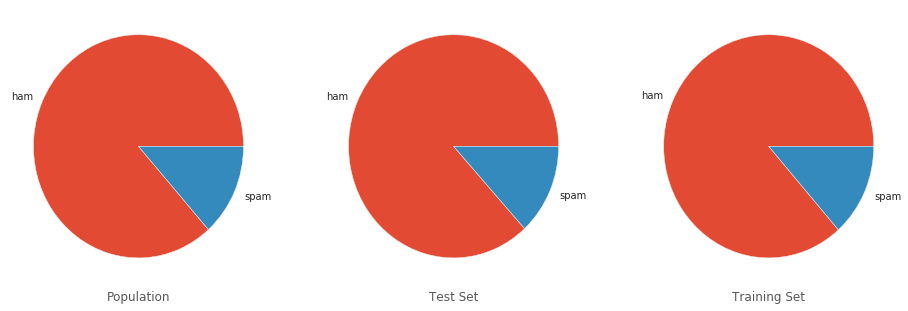

In [10]:
# pie_df = pd.DataFrame({"Population": [pie_1[0], pie_1[1]], "Test Sample": [pie_2[0], pie_2[1]], "Training Sample": [pie_3[0], pie_3[1]]})

mono_font = {'fontname':'monospace'}

plt.style.use("ggplot")
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
pie_1.plot.pie(label="")
plt.xlabel("Population")
plt.subplot(1, 3, 2)
pie_2.plot.pie(label="")
plt.xlabel("Test Set")
plt.subplot(1, 3, 3)
pie_3.plot.pie(label="")
plt.xlabel("Training Set")
plt.show()

# Preparing for the Naive Bayes Theorem 1: Text Cleaning

We will use the Naive Bayes Theorem to introdue predictability into our filter. However, our data isn't quite ready yet. We need to clean the data for this purpose.

Since we're going to focus on word repetition as a flag for spam, we'll remove punctuation & capitalization from the messages in the following scripts.

Afterward, we'll ready our data by creating another dataset for calculations.

In [11]:
#Without changes
ts["SMS"].head(3)

0                     Yep, by the pretty sculpture
1    Yes, princess. Are you going to make me moan?
2                       Welp apparently he retired
Name: SMS, dtype: object

In [12]:
#Here we lower the case of all our SMS and remove their punctuation.
import re

ts["SMS"] = ts["SMS"].str.replace("\W", " ").str.lower()
ts["SMS"].head(3)

0                     yep  by the pretty sculpture
1    yes  princess  are you going to make me moan 
2                       welp apparently he retired
Name: SMS, dtype: object

In [13]:
#Here we split each word into its own unique column. 
#This allows us to count unique vocabulary & eventually create a vocabulary set.

vocabulary = []

ts["SMS"] = ts["SMS"].str.split()

for entry in ts["SMS"]:
    for element in entry:
        vocabulary.append(element)

In [14]:
#We use a set method to remove duplications, then make a list again for further operations.
vocabulary = list(set(vocabulary))
len(vocabulary)

7783

# Preparing for the Naive Bayes Theorem 2: Creating a Working Dataframe

It's time to create a new dataset for direct work. This code beneath us creates a dictionary we will turn into a table and dataframe.

In [15]:
word_counts_per_sms = {unique_word: [0] * len(ts["SMS"]) for unique_word in vocabulary}

#In the for loop below, we increment 1 per word for each word used in an sms, per sms. 

for index, sms in enumerate(ts["SMS"]):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [16]:
#Now we make the dataframe and concatenate it with our ts dataframe. This way, we have the label & SMS columns.

temp_df = pd.DataFrame(word_counts_per_sms)
clean_word_counts = pd.concat([ts, temp_df], axis=1)

In [17]:
clean_word_counts.head()

,Label,SMS,0,00,000,000pes,008704050406,0089,01223585334,02,...,zindgi,zoe,zogtorius,zouk,zyada,é,ú1,ü,〨ud,鈥
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


# Naive Bayes Implementation (Constants)

We finally have a working set of data. Next, we create a function which implements the following formula:

Before we can do this, we need to:

- Calculate our constants. This keeps computation time to a minimum.
- Implement parameters.
- Create the key function which implements the Naive Bayes Theorem.

In [18]:
#Here we isolate our spam & ham messages.
spam_messages = clean_word_counts[clean_word_counts["Label"] == "spam"]
ham_messages = clean_word_counts[clean_word_counts["Label"] == "ham"]

#These are the probabilities an SMS will be spam or ham. P(spam) and P(ham)
p_spam = clean_word_counts["Label"].value_counts(normalize=True)[1]
p_ham = clean_word_counts["Label"].value_counts(normalize=True)[0]

#Laplace smoothening
alpha = 1

#Number of words which are in spam messages = N(spam)
number_of_words_per_spam = spam_messages["SMS"].apply(len)
n_spam = number_of_words_per_spam.sum()

#Number of words which are in ham messages = N(ham)
number_of_words_per_ham = ham_messages["SMS"].apply(len)
n_ham = number_of_words_per_ham.sum()

#Number of unique words
n_vocabulary = len(vocabulary)

# Naive Bayes Implementation (Parameters)

We need the parameters. Parameters, in this sense, are the probability values P(wi|spam) and P(wi|ham) have. We do this by creating dictionaries for both "words given spam" and "words given ham" profiles, then filling them with the probability for each word.

In [19]:
parameters_spam = {unique_word: 0 for unique_word in vocabulary}
parameters_ham = {unique_word: 0 for unique_word in vocabulary}

In [20]:
for word in vocabulary:
    p_word_given_spam_ans = (spam_messages[word].sum() + alpha) / (n_spam + (alpha * n_vocabulary))
    p_word_given_ham_ans = (ham_messages[word].sum() + alpha) / (n_ham + (alpha * n_vocabulary))
    parameters_spam[word] = p_word_given_spam_ans
    parameters_ham[word] = p_word_given_ham_ans

In [21]:
import re

def classify(message):

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
  

    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

In [22]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [23]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


# Evaluating the Spam Filter

We finished our spam filter function! Now we need to evaluate it, and determine improvements. We use our 20% test data, hitherto untouched, to determine our spam filter's efficacy.

First, we need to adjust our code above to make it cooperate with the evaluation.

In [24]:
#This is the same function from above, but we adjust the print code to return a value.
def classify_test(message):

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]

    if p_ham_given_message > p_spam_given_message:
        return "ham"
    elif p_ham_given_message < p_spam_given_message:
        return "spam"
    else:
        return "Equal probabilities. Get human classification."

In [25]:
correct = 0
total = len(test["SMS"])

for index, row in test.iterrows():
    sms = row[1]
    evaluation = classify_test(sms)
    if evaluation == row[0]:
        correct += 1

spam_filter_accuracy = correct/total
print("Our filter predicts the correct answer {:.2%} of the time!".format(spam_filter_accuracy))

Our filter predicts the correct answer 98.74% of the time!


# Success!

Our spam filter has a success rate of 98.74%! That's quite good for a first iteration.

It also concludes our project. We hope you find this core logic useful.